# 🔥 Neural Network ด้วย TensorFlow

**จุดประสงค์**: เรียนรู้วิธีสร้าง Neural Network ด้วย **TensorFlow 1.x**

**โค้ดต้นฉบับ**: `machine_learning_examples-master/ann_class/tf_example.py`

---

## 🎯 TensorFlow vs NumPy vs sklearn

| | NumPy (Manual) | sklearn | TensorFlow |
|---|---|---|---|
| **โค้ด** | 200+ บรรทัด | 3 บรรทัด | ~50 บรรทัด |
| **Gradient** | เขียนเอง | Auto | **Auto (Autodiff)** ✨ |
| **GPU** | ❌ | ❌ | ✅ |
| **Scalability** | Small data | Medium | **Large (Production)** |
| **Flexibility** | Full control | Limited | **High** |
| **ใช้เมื่อไหร่?** | เรียนรู้ | Quick ML | Deep Learning, Production |

💡 **TensorFlow** = Library สำหรับ Deep Learning ที่ใช้ใน Production จริง (Google, Uber, Airbnb)

---

## 🧠 TensorFlow Concepts (สำคัญ!)

### **TensorFlow 1.x** (โค้ดนี้) vs **TensorFlow 2.x**:

| | TensorFlow 1.x (เก่า) | TensorFlow 2.x (ใหม่) |
|---|---|---|
| **Style** | **Computational Graph** | Eager Execution |
| **Workflow** | 1. Build graph → 2. Run session | เขียนเหมือน Python ทั่วไป |
| **Placeholders** | ✅ ใช้ `tf.placeholder` | ❌ ไม่ใช้แล้ว |
| **Session** | ✅ ต้องสร้าง `tf.Session()` | ❌ ไม่ต้อง |
| **ปัจจุบัน** | Legacy (เก่า) | **Recommended** |

**โค้ดนี้ใช้ TensorFlow 1.x** → เรียนรู้ concepts พื้นฐาน!

---

## 📊 ข้อมูล: 3-Class Classification

**เหมือน `forwardprop.ipynb` และ `backprop.ipynb`**:
- 3 classes, 500 samples per class
- 2D input features
- Task: แยก 3 กลุ่ม

**Architecture**:
```
Input (2) → Hidden (3, Sigmoid) → Output (3, Softmax)
```

## 📦 Step 1: Setup & Check TensorFlow

⚠️ **Note**: โค้ดนี้ใช้ **TensorFlow 1.x** (เก่า)

ถ้าคุณใช้ TensorFlow 2.x ต้องเปิด compatibility mode:
```python
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# Import TensorFlow
try:
    # สำหรับ TensorFlow 2.x (ใช้ compatibility mode)
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    print(f"✅ TensorFlow version: {tf.__version__} (using TF 1.x compatibility mode)")
except:
    # สำหรับ TensorFlow 1.x (เก่า)
    import tensorflow as tf
    print(f"✅ TensorFlow version: {tf.__version__}")

# เพิ่ม path
sys.path.append('../../machine_learning_examples-master')

# Set seeds
np.random.seed(42)
tf.set_random_seed(42)

print("✅ พร้อมเรียนรู้ TensorFlow Neural Network!")


Instructions for updating:
non-resource variables are not supported in the long term
✅ TensorFlow version: 2.20.0 (using TF 1.x compatibility mode)
✅ พร้อมเรียนรู้ TensorFlow Neural Network!


## 🔢 Step 2: สร้างข้อมูล (3 Classes)

**แนวคิด**: เหมือน `forwardprop.ipynb` - 3 กลุ่มใน 2D space

In [2]:
# Parameters
Nclass = 500  # จำนวน samples ต่อ class
D = 2         # input dimensions
M = 3         # hidden layer size
K = 3         # number of classes

# สร้างข้อมูล 3 classes
X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)  # ⚠️ TensorFlow ใช้ float32

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

print(f"✅ สร้างข้อมูลเรียบร้อย!")
print(f"   X shape: {X.shape} (N x D) = (1500 x 2)")
print(f"   Y shape: {Y.shape} (N,) = (1500,)")
print(f"   Data type: {X.dtype} ← สำคัญ! TensorFlow ใช้ float32")

✅ สร้างข้อมูลเรียบร้อย!
   X shape: (1500, 2) (N x D) = (1500 x 2)
   Y shape: (1500,) (N,) = (1500,)
   Data type: float32 ← สำคัญ! TensorFlow ใช้ float32


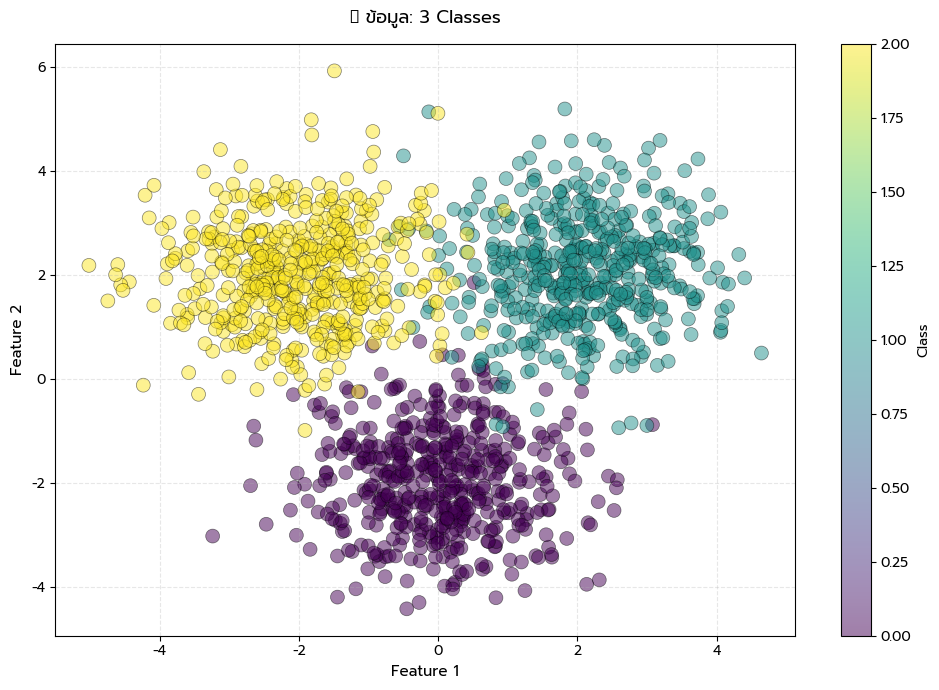

💡 เหมือนข้อมูลใน forwardprop.ipynb และ backprop.ipynb!


In [3]:
# Visualize data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5, cmap='viridis', edgecolors='black', linewidth=0.5)
plt.title('📊 ข้อมูล: 3 Classes', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Feature 1', fontsize=11)
plt.ylabel('Feature 2', fontsize=11)
plt.colorbar(label='Class')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("💡 เหมือนข้อมูลใน forwardprop.ipynb และ backprop.ipynb!")

## 🎯 Step 3: One-Hot Encode Target (T)

**แนวคิด**: แปลง Y (class labels) → T (one-hot matrix)

**ทำไม?** TensorFlow's `softmax_cross_entropy` ต้องการ one-hot format

**Example**:
```
Y = [0, 1, 2] → T = [[1,0,0], [0,1,0], [0,0,1]]
```

In [4]:
# One-Hot Encoding
N = len(Y)
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

print(f"✅ One-Hot Encoding เรียบร้อย!")
print(f"   T shape: {T.shape} (N x K) = (1500 x 3)")
print(f"")
print(f"💡 ตัวอย่าง:")
for i in range(5):
    print(f"   Y[{i}] = {Y[i]} → T[{i}] = {T[i]}")

✅ One-Hot Encoding เรียบร้อย!
   T shape: (1500, 3) (N x K) = (1500 x 3)

💡 ตัวอย่าง:
   Y[0] = 0 → T[0] = [1. 0. 0.]
   Y[1] = 0 → T[1] = [1. 0. 0.]
   Y[2] = 0 → T[2] = [1. 0. 0.]
   Y[3] = 0 → T[3] = [1. 0. 0.]
   Y[4] = 0 → T[4] = [1. 0. 0.]


## 🏗️ Step 4: Build Computational Graph

**TensorFlow 1.x Workflow**:
1. **Define Graph** - สร้าง operations (ยังไม่รัน!)
2. **Run Session** - execute graph ด้วย `sess.run()`

### 4.1 Define Placeholders

**Placeholder** = ตัวแปรที่ใส่ค่าทีหลัง (เวลา run)

```python
tfX = tf.placeholder(tf.float32, [None, D])
```
- `None` = จำนวน samples ใดๆ ก็ได้ (flexible)
- `D` = จำนวน features (2)

In [5]:
# Placeholders - ตัวแปรที่จะใส่ค่าภายหลัง
tfX = tf.placeholder(tf.float32, [None, D])  # Input: (N, 2)
tfY = tf.placeholder(tf.float32, [None, K])  # Target: (N, 3) one-hot

print("✅ สร้าง Placeholders เรียบร้อย!")
print(f"   tfX: {tfX}")
print(f"   tfY: {tfY}")
print(f"")
print("💡 Placeholder คือ:")
print("   • ตัวแปรที่ใส่ค่าทีหลัง (เวลา sess.run)")
print("   • None = จำนวน samples ใดๆ ก็ได้")
print("   • ใช้ feed_dict เพื่อใส่ค่าจริง")

✅ สร้าง Placeholders เรียบร้อย!
   tfX: Tensor("Placeholder:0", shape=(?, 2), dtype=float32)
   tfY: Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)

💡 Placeholder คือ:
   • ตัวแปรที่ใส่ค่าทีหลัง (เวลา sess.run)
   • None = จำนวน samples ใดๆ ก็ได้
   • ใช้ feed_dict เพื่อใส่ค่าจริง


### 4.2 Initialize Weights (Variables)

**TensorFlow Variable** = weights ที่จะ update ระหว่าง training

**แตกต่างจาก NumPy**:
- NumPy: `W = np.random.randn(D, M)`
- TensorFlow: `W = tf.Variable(tf.random_normal([D, M], stddev=0.01))`

In [6]:
# Helper function
def init_weights(shape):
    """
    Initialize TensorFlow Variable with random normal
    
    Parameters:
    - shape: tuple (e.g., [D, M])
    
    Returns:
    - tf.Variable
    """
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

# สร้าง Weights
W1 = init_weights([D, M])  # Hidden layer weights (2, 3)
b1 = init_weights([M])     # Hidden layer bias (3,)
W2 = init_weights([M, K])  # Output layer weights (3, 3)
b2 = init_weights([K])     # Output layer bias (3,)

print("✅ สร้าง Weight Variables เรียบร้อย!")
print(f"   W1: {W1.shape} (D x M) = (2 x 3)")
print(f"   b1: {b1.shape} (M,) = (3,)")
print(f"   W2: {W2.shape} (M x K) = (3 x 3)")
print(f"   b2: {b2.shape} (K,) = (3,)")
print(f"")
print("💡 tf.Variable vs NumPy:")
print("   • NumPy array = ค่าตายตัว")
print("   • tf.Variable = สามารถ update ได้ (training)")

✅ สร้าง Weight Variables เรียบร้อย!
   W1: (2, 3) (D x M) = (2 x 3)
   b1: (3,) (M,) = (3,)
   W2: (3, 3) (M x K) = (3 x 3)
   b2: (3,) (K,) = (3,)

💡 tf.Variable vs NumPy:
   • NumPy array = ค่าตายตัว
   • tf.Variable = สามารถ update ได้ (training)


### 4.3 Define Forward Propagation

**แนวคิด**: สร้าง computational graph สำหรับ forward pass

**Architecture**:
```
X → Z = sigmoid(X·W1 + b1) → Logits = Z·W2 + b2
```

**Logits** = output ก่อน softmax (raw scores)

In [7]:
def forward(X, W1, b1, W2, b2):
    """
    Forward Propagation in TensorFlow
    
    Architecture:
    Input → Hidden (Sigmoid) → Output (Logits)
    
    Parameters:
    - X: input placeholder
    - W1, b1: hidden layer weights
    - W2, b2: output layer weights
    
    Returns:
    - logits: raw output scores (before softmax)
    """
    # Hidden Layer: Z = sigmoid(X·W1 + b1)
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    
    # Output Layer: Logits = Z·W2 + b2 (no activation yet!)
    logits = tf.matmul(Z, W2) + b2
    
    return logits

# สร้าง logits (output graph)
logits = forward(tfX, W1, b1, W2, b2)

print("✅ สร้าง Forward Propagation Graph เรียบร้อย!")
print(f"   Logits: {logits}")
print(f"")
print("💡 Logits คือ:")
print("   • Output ก่อน softmax (raw scores)")
print("   • TensorFlow จะทำ softmax ให้เองใน loss function")
print("   • ไม่ต้องเขียน softmax เอง!")

✅ สร้าง Forward Propagation Graph เรียบร้อย!
   Logits: Tensor("add_1:0", shape=(?, 3), dtype=float32)

💡 Logits คือ:
   • Output ก่อน softmax (raw scores)
   • TensorFlow จะทำ softmax ให้เองใน loss function
   • ไม่ต้องเขียน softmax เอง!


### 4.4 Define Loss Function

**Cross-Entropy Loss** (automatic softmax!):

```python
cost = tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=tfY,    # one-hot encoded
    logits=logits  # raw scores (before softmax)
)
```

⚠️ **สำคัญ**: ฟังก์ชันนี้ทำ softmax ให้เองแล้ว! ไม่ต้องใส่ output ที่ผ่าน softmax แล้ว

In [8]:
# Loss Function - Cross-Entropy (with automatic softmax)
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=tfY,
        logits=logits
    )
)

print("✅ สร้าง Loss Function เรียบร้อย!")
print(f"   Cost: {cost}")
print(f"")
print("💡 TensorFlow ทำให้ง่าย:")
print("   • softmax_cross_entropy ทำ softmax + cross-entropy ในครั้งเดียว")
print("   • เร็วกว่าและแม่นกว่าทำแยก!")
print("   • reduce_mean = หาค่าเฉลี่ย (loss ต่อ sample)")

✅ สร้าง Loss Function เรียบร้อย!
   Cost: Tensor("Mean:0", shape=(), dtype=float32)

💡 TensorFlow ทำให้ง่าย:
   • softmax_cross_entropy ทำ softmax + cross-entropy ในครั้งเดียว
   • เร็วกว่าและแม่นกว่าทำแยก!
   • reduce_mean = หาค่าเฉลี่ย (loss ต่อ sample)


### 4.5 Define Optimizer

**แนวคิด**: TensorFlow คำนวณ gradients และ update weights ให้อัตโนมัติ!

**Optimizer** = algorithm สำหรับ update weights
- `GradientDescentOptimizer` = basic SGD
- `AdamOptimizer` = adaptive (better!)
- `RMSPropOptimizer` = adaptive

```python
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
```

💡 `.minimize(cost)` = คำนวณ gradients + update weights อัตโนมัติ!

In [9]:
# Optimizer - Gradient Descent
learning_rate = 0.05
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

print("✅ สร้าง Optimizer เรียบร้อย!")
print(f"   Algorithm: Gradient Descent")
print(f"   Learning Rate: {learning_rate}")
print(f"")
print("💡 TensorFlow ทำ Backpropagation ให้อัตโนมัติ:")
print("   • คำนวณ gradients ด้วย Automatic Differentiation")
print("   • Update weights: W = W - lr × ∇W")
print("   • ไม่ต้องเขียนเอง!")


✅ สร้าง Optimizer เรียบร้อย!
   Algorithm: Gradient Descent
   Learning Rate: 0.05

💡 TensorFlow ทำ Backpropagation ให้อัตโนมัติ:
   • คำนวณ gradients ด้วย Automatic Differentiation
   • Update weights: W = W - lr × ∇W
   • ไม่ต้องเขียนเอง!


### 4.6 Define Prediction

**แนวคิด**: หา class ที่มี probability สูงสุด

```python
predict_op = tf.argmax(logits, 1)
```
- `axis=1` = หา max ตาม row (แต่ละ sample)
- Return: class index (0, 1, or 2)

In [10]:
# Prediction - argmax
predict_op = tf.argmax(logits, 1)  # axis=1 = ตาม row

print("✅ สร้าง Prediction Operation เรียบร้อย!")
print(f"   Predict: {predict_op}")
print(f"")
print("💡 argmax คือ:")
print("   • หา index ของค่าสูงสุด")
print("   • logits = [0.5, 2.1, 0.8] → argmax = 1 (class 1)")
print("   • axis=1 = หา max ตาม row (แต่ละ sample)")

✅ สร้าง Prediction Operation เรียบร้อย!
   Predict: Tensor("ArgMax:0", shape=(?,), dtype=int64)

💡 argmax คือ:
   • หา index ของค่าสูงสุด
   • logits = [0.5, 2.1, 0.8] → argmax = 1 (class 1)
   • axis=1 = หา max ตาม row (แต่ละ sample)


## 🎬 Step 5: Run Session (Execute Graph!)

**TensorFlow 1.x Workflow**:
1. ✅ Build Graph - เสร็จแล้ว!
2. 🔄 **Run Session** - รันตอนนี้!

### 5.1 Create Session & Initialize Variables

In [11]:
# Create Session
sess = tf.Session()

# Initialize all Variables (W1, b1, W2, b2)
init = tf.global_variables_initializer()
sess.run(init)

print("✅ Session สร้างเรียบร้อย!")
print("✅ Variables initialized!")
print(f"")
print("💡 TensorFlow 1.x ต้องทำ:")
print("   1. สร้าง Session (sess = tf.Session())")
print("   2. Initialize variables (sess.run(init))")
print("   3. Run operations (sess.run(...))")

✅ Session สร้างเรียบร้อย!
✅ Variables initialized!

💡 TensorFlow 1.x ต้องทำ:
   1. สร้าง Session (sess = tf.Session())
   2. Initialize variables (sess.run(init))
   3. Run operations (sess.run(...))


### 5.2 Training Loop

**แนวคิด**: วนซ้ำ 1000 epochs, update weights ทุกครั้ง

```python
sess.run(train_op, feed_dict={tfX: X, tfY: T})
```

**feed_dict** = ใส่ค่าจริงเข้า placeholders
- `tfX` ← `X` (data)
- `tfY` ← `T` (one-hot targets)

In [12]:
# Training Loop
epochs = 1000
costs = []
accuracies = []

print("🏋️ เริ่ม Training...\n")

for i in range(epochs):
    # Training step (update weights)
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    
    # Calculate predictions
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    
    # Calculate accuracy
    accuracy = np.mean(Y == pred)
    
    # Calculate cost
    cost_val = sess.run(cost, feed_dict={tfX: X, tfY: T})
    
    # Store for plotting
    costs.append(cost_val)
    accuracies.append(accuracy)
    
    # Print progress
    if i % 100 == 0:
        print(f"Epoch {i:4d} | Cost: {cost_val:.6f} | Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n✅ Training เสร็จแล้ว!")
print(f"")
print(f"📊 สรุปผลลัพธ์:")
print(f"   • Accuracy เริ่มต้น: {accuracies[0]:.4f} ({accuracies[0]*100:.2f}%)")
print(f"   • Accuracy สุดท้าย: {accuracies[-1]:.4f} ({accuracies[-1]*100:.2f}%)")
print(f"   • ปรับปรุง: +{(accuracies[-1] - accuracies[0])*100:.2f}%")

🏋️ เริ่ม Training...

Epoch    0 | Cost: 1.098597 | Accuracy: 0.3333 (33.33%)
Epoch  100 | Cost: 1.097804 | Accuracy: 0.3333 (33.33%)
Epoch  200 | Cost: 1.088778 | Accuracy: 0.4727 (47.27%)
Epoch  300 | Cost: 1.015313 | Accuracy: 0.6507 (65.07%)
Epoch  400 | Cost: 0.835461 | Accuracy: 0.6993 (69.93%)
Epoch  500 | Cost: 0.671970 | Accuracy: 0.8200 (82.00%)
Epoch  600 | Cost: 0.541202 | Accuracy: 0.9080 (90.80%)
Epoch  700 | Cost: 0.435850 | Accuracy: 0.9460 (94.60%)
Epoch  800 | Cost: 0.357876 | Accuracy: 0.9567 (95.67%)
Epoch  900 | Cost: 0.302054 | Accuracy: 0.9647 (96.47%)

✅ Training เสร็จแล้ว!

📊 สรุปผลลัพธ์:
   • Accuracy เริ่มต้น: 0.3333 (33.33%)
   • Accuracy สุดท้าย: 0.9660 (96.60%)
   • ปรับปรุง: +63.27%


## 📊 Step 6: Visualize Training Progress

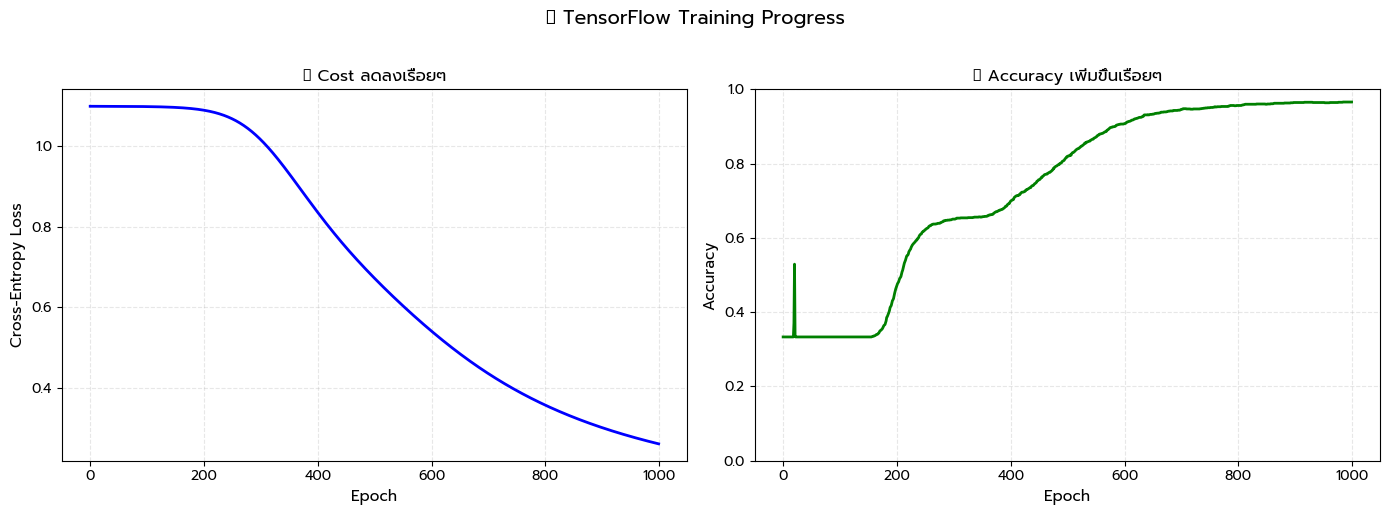

💡 สังเกต:
   • Cost ลดลง → โมเดลเรียนรู้
   • Accuracy เพิ่มขึ้น → ทำนายถูกต้องขึ้น
   • TensorFlow ทำ backpropagation อัตโนมัติ!


In [13]:
# Plot Cost and Accuracy
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Cost
ax[0].plot(costs, linewidth=2, color='blue')
ax[0].set_xlabel('Epoch', fontsize=11)
ax[0].set_ylabel('Cross-Entropy Loss', fontsize=11)
ax[0].set_title('📉 Cost ลดลงเรื่อยๆ', fontsize=12, fontweight='bold')
ax[0].grid(alpha=0.3, linestyle='--')

# Plot 2: Accuracy
ax[1].plot(accuracies, linewidth=2, color='green')
ax[1].set_xlabel('Epoch', fontsize=11)
ax[1].set_ylabel('Accuracy', fontsize=11)
ax[1].set_title('📈 Accuracy เพิ่มขึ้นเรื่อยๆ', fontsize=12, fontweight='bold')
ax[1].set_ylim([0, 1])
ax[1].grid(alpha=0.3, linestyle='--')

plt.suptitle('🏆 TensorFlow Training Progress', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 สังเกต:")
print("   • Cost ลดลง → โมเดลเรียนรู้")
print("   • Accuracy เพิ่มขึ้น → ทำนายถูกต้องขึ้น")
print("   • TensorFlow ทำ backpropagation อัตโนมัติ!")

## 🎯 Step 7: Visualize Predictions

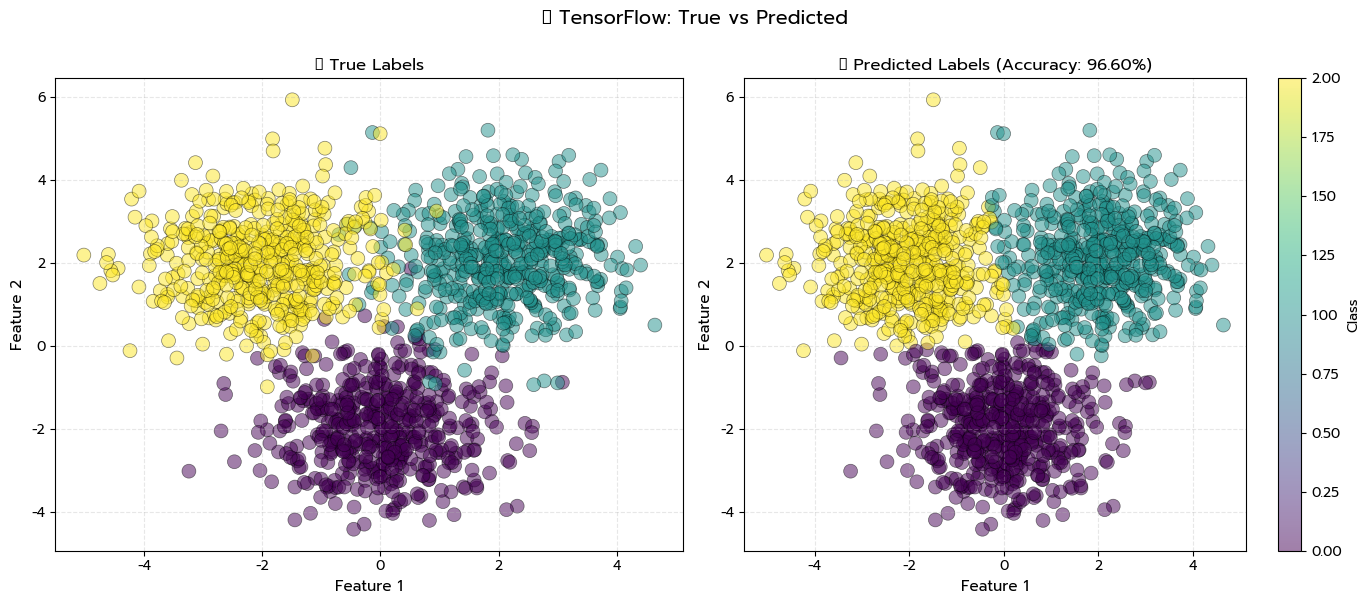

In [14]:
# Get final predictions
final_pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})

# Plot: True vs Predicted
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: True labels
ax[0].scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5, cmap='viridis', edgecolors='black', linewidth=0.5)
ax[0].set_title('✅ True Labels', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Feature 1', fontsize=11)
ax[0].set_ylabel('Feature 2', fontsize=11)
ax[0].grid(alpha=0.3, linestyle='--')

# Plot 2: Predicted labels
scatter = ax[1].scatter(X[:, 0], X[:, 1], c=final_pred, s=100, alpha=0.5, cmap='viridis', edgecolors='black', linewidth=0.5)
ax[1].set_title(f'🔮 Predicted Labels (Accuracy: {accuracies[-1]*100:.2f}%)', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Feature 1', fontsize=11)
ax[1].set_ylabel('Feature 2', fontsize=11)
ax[1].grid(alpha=0.3, linestyle='--')

plt.colorbar(scatter, ax=ax[1], label='Class')
plt.suptitle('🎯 TensorFlow: True vs Predicted', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 🧹 Step 8: Clean Up (ปิด Session)

**สำคัญ**: ต้องปิด Session เพื่อปล่อย resources!

In [15]:
# ปิด Session
sess.close()

print("✅ Session ปิดเรียบร้อย!")
print("")
print("💡 TensorFlow 1.x Best Practice:")
print("   • เสร็จแล้วต้องปิด sess.close()")
print("   • หรือใช้ context manager: with tf.Session() as sess:")

✅ Session ปิดเรียบร้อย!

💡 TensorFlow 1.x Best Practice:
   • เสร็จแล้วต้องปิด sess.close()
   • หรือใช้ context manager: with tf.Session() as sess:


## 🎓 สรุปสุดท้าย: TensorFlow Neural Network

### 🔑 Key Concepts:

#### 1️⃣ **TensorFlow 1.x Workflow**:

```python
# 1. Define Graph
tfX = tf.placeholder(...)
W = tf.Variable(...)
logits = forward(...)
cost = tf.nn.softmax_cross_entropy(...)
train_op = optimizer.minimize(cost)

# 2. Run Session
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
sess.close()
```

---

#### 2️⃣ **TensorFlow Concepts**:

| Concept | Purpose | Example |
|---------|---------|----------|
| **Placeholder** | ใส่ค่าทีหลัง | `tf.placeholder(tf.float32, [None, D])` |
| **Variable** | Weights ที่ update ได้ | `tf.Variable(tf.random_normal([D, M]))` |
| **Operation** | การคำนวณ | `tf.matmul()`, `tf.nn.sigmoid()` |
| **Session** | รัน graph | `sess = tf.Session()` |
| **feed_dict** | ใส่ค่าเข้า placeholders | `{tfX: X, tfY: T}` |

---

#### 3️⃣ **TensorFlow Advantages**:

**✅ Automatic Differentiation**:
- คำนวณ gradients อัตโนมัติ
- ไม่ต้องเขียน backpropagation เอง
- แม่นกว่า + เร็วกว่า manual

**✅ GPU Support**:
- รัน operations บน GPU อัตโนมัติ
- เร็วกว่า CPU หลายเท่า
- เหมาะกับ large-scale models

**✅ Production Ready**:
- Deploy ง่าย (TensorFlow Serving)
- รองรับ mobile (TensorFlow Lite)
- ใช้ใน Google, Uber, Airbnb, etc.

---

#### 4️⃣ **เปรียบเทียบ Approaches**:

| | NumPy (Manual) | sklearn | TensorFlow |
|---|---|---|---|
| **Gradient** | เขียนเอง ✍️ | Auto 🤖 | **Autodiff** 🚀 |
| **GPU** | ❌ | ❌ | ✅ |
| **Flexibility** | 🟢 High | 🟡 Medium | 🟢 **Very High** |
| **Ease of Use** | 🔴 Hard | 🟢 Easy | 🟡 Medium |
| **Scalability** | 🔴 Small | 🟡 Medium | 🟢 **Large** |
| **Best For** | Learning | Quick ML | **Deep Learning** |

---

### 💡 สิ่งที่เรียนรู้:

#### ✅ **TensorFlow 1.x Workflow**:
1. Define Placeholders (`tf.placeholder`)
2. Initialize Variables (`tf.Variable`)
3. Build Graph (forward, loss, optimizer)
4. Create Session (`tf.Session()`)
5. Initialize Variables (`sess.run(init)`)
6. Train (`sess.run(train_op, feed_dict=...)`)
7. Close Session (`sess.close()`)

#### ✅ **Key TensorFlow Operations**:
- `tf.nn.sigmoid()` - Sigmoid activation
- `tf.nn.softmax_cross_entropy_with_logits_v2()` - Loss (with auto softmax)
- `tf.train.GradientDescentOptimizer()` - Optimizer
- `tf.argmax()` - Get predicted class

#### ✅ **Automatic Differentiation**:
- TensorFlow คำนวณ gradients อัตโนมัติ
- ไม่ต้องเขียน `derivative_W1()`, `derivative_b1()`, etc.
- แค่ `.minimize(cost)` เท่านั้น!

---

### 🚀 ขั้นตอนต่อไป:

#### 1️⃣ **ลอง TensorFlow 2.x** (Recommended!):
```python
# TensorFlow 2.x - ง่ายกว่ามาก!
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=1000)
```

#### 2️⃣ **ลอง Optimizer อื่น**:
```python
# แทนที่ GradientDescentOptimizer ด้วย:
train_op = tf.train.AdamOptimizer(0.001).minimize(cost)      # Adam (better!)
train_op = tf.train.RMSPropOptimizer(0.001).minimize(cost)   # RMSProp
train_op = tf.train.MomentumOptimizer(0.05, 0.9).minimize(cost)  # Momentum
```

#### 3️⃣ **ลอง Activation อื่น**:
```python
Z = tf.nn.relu(tf.matmul(X, W1) + b1)      # ReLU (standard)
Z = tf.nn.tanh(tf.matmul(X, W1) + b1)      # Tanh
Z = tf.nn.elu(tf.matmul(X, W1) + b1)       # ELU
```

#### 4️⃣ **ลอง Regularization**:
```python
# L2 Regularization
l2_loss = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2)
cost = cost + 0.01 * l2_loss  # alpha = 0.01
```

---

### 📚 เปรียบเทียบกับ Notebooks อื่น:

| Notebook | Focus | Gradient | Code Style |
|----------|-------|----------|------------|
| **forwardprop.ipynb** | Forward only | ❌ None | NumPy |
| **backprop.ipynb** | Full training | ✍️ Manual | NumPy |
| **sklearn_ann.ipynb** | Quick ML | 🤖 Auto (hidden) | sklearn |
| **tf_example.ipynb** (นี่!) | Deep Learning | 🚀 **Autodiff** | TensorFlow |

---

## 🎉 สรุปสั้นๆ:

> **"TensorFlow = Deep Learning Framework สำหรับงานจริง"**

**TensorFlow 1.x Workflow**:
1. **Define Graph** - สร้าง placeholders, variables, operations
2. **Run Session** - execute graph ด้วย `sess.run()`
3. **Train** - update weights อัตโนมัติด้วย optimizer

**ข้อดี**:
- ✅ Automatic Differentiation (ไม่ต้องเขียน gradients)
- ✅ GPU Support (เร็วมาก!)
- ✅ Production Ready (deploy ง่าย)
- ✅ Scalable (large datasets)

**ข้อเสีย**:
- ❌ TensorFlow 1.x ซับซ้อน (Session, Graph, feed_dict)
- ❌ Learning curve สูงกว่า sklearn
- 💡 แนะนำใช้ **TensorFlow 2.x** แทน (ง่ายกว่ามาก!)

---

### 🤔 คำถามท้ายบท:

1. **ทำไมใช้ Placeholder?**
   - เพื่อสร้าง flexible graph ที่รับข้อมูลขนาดต่างๆ ได้
   - ใส่ค่าจริงทีหลังด้วย feed_dict

2. **ทำไม TensorFlow ถึงเร็ว?**
   - รัน operations บน GPU
   - Optimize computational graph
   - C++ backend (ไม่ใช่ pure Python)

3. **Autodiff ต่างจาก Manual Gradient อย่างไร?**
   - Manual: เขียนสูตร derivative เอง (ผิดพลาดได้)
   - Autodiff: TensorFlow คำนวณให้อัตโนมัติ (แม่นกว่า)

4. **TensorFlow 1.x vs 2.x?**
   - TF 1.x: Session-based, ซับซ้อน
   - TF 2.x: Eager execution, ง่ายกว่ามาก (เหมือน NumPy)
   - **แนะนำ TF 2.x สำหรับ projects ใหม่!**

✨ **Happy Learning with TensorFlow!** ✨